In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import corner as cr


%matplotlib inline

# Load Data

In [5]:
Data=np.genfromtxt('data.dat') #

#Data: 
d=Data[:,0] #original units are in MPC 
d_err=Data[:,1] #km/s
vel=Data[:,2] #km/s

d_c=(Data[:,0]*3.086e19)  #distance in km 
d_err_c=(Data[:,1]*3.086e19) #distance error in km




## Ploting Data 

(0, 500)

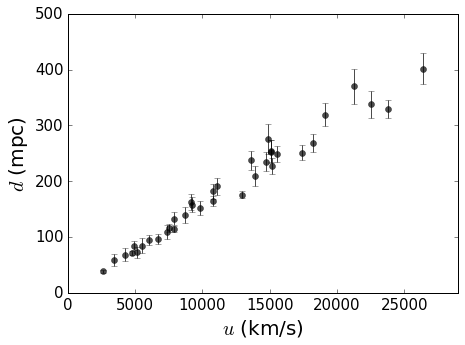

In [24]:
plt.figure(figsize=(7,5))
plt.errorbar(vel,d,yerr=d_err,color='k',fmt='o',alpha=0.7)
plt.xlabel('$u$ (km/s)',size=20)
plt.ylabel('$d$ (mpc)',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,29000)
plt.ylim(0,500)


# Our data seems to follow a linear trend -- the slope of this describe this line (best fit) is Hubble's Const.

## Load PolyFit Best Fit Line with Age and H. Constant

PolyFit Estimate of Universe: 15.0235330779
PolyFit Estimate of Hubble Constant: 65.1354393756


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text yticklabel objects>)

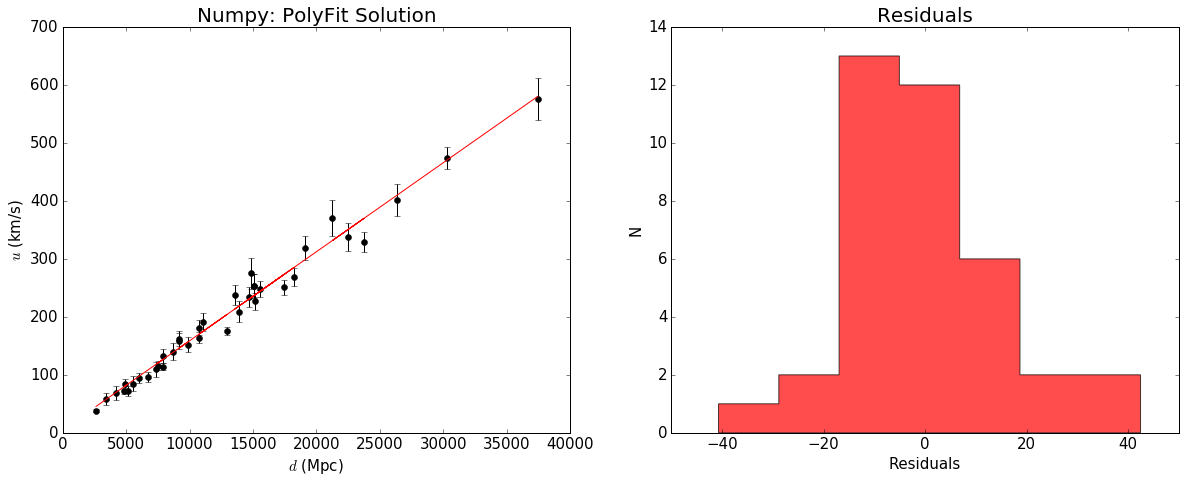

In [25]:
ply_line=np.polyfit(vel,d,1)  #polyfit line! ...not scaled

plt.figure(figsize=(20,16))
plt.subplot(221)
plt.errorbar(vel,d,yerr=d_err,fmt='o',color='k') 
plt.plot(vel,ply_line[0]*vel+ply_line[1],color='red')
plt.title('Numpy: PolyFit Solution',size=20)
plt.xlabel('$d$ (Mpc)',size=15)
plt.ylabel('$u$ (km/s)',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

print 'PolyFit Estimate of Universe: %s' %(ply_line[0]*3.086e19*3.17098e-8 * 10**-9) #Age of the universe with conversions
print 'PolyFit Estimate of Hubble Constant: %s' %(1/(ply_line[0])) #Hubble constant 1/Age ~ Note on the units of hubble const


plt.subplot(222)
line=ply_line[0]*vel+ply_line[1] #define equation of line! 
res=d-line
plt.hist(res,histtype='stepfilled',color='red',alpha=0.7,bins=7)
plt.xlabel('Residuals',size=15)
plt.ylabel('N',size=15)
plt.title('Residuals',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)



## Estimate Age of Universe & Hubble Constant Using: Normal Equation

Normal Equation Estimate of Universe: 15.0235330779
Normal Equation of Hubble Constant: 65.1354393756


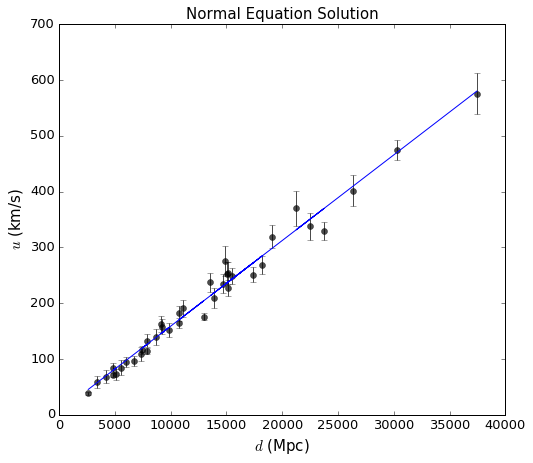

In [26]:
#Re-arange dimensions/matricies of data
dist=np.ones(shape=(len(d),1))
dist[:,0]=d #this your y (N,1) matrix 

Velo=np.ones(shape=(len(vel),2))
Velo[:,1]=vel 

#Estimate b-factors
b=np.dot(np.linalg.inv(np.dot(Velo.T,Velo)),np.dot(Velo.T,dist)) #note here: b[1]:slope, b[0]:interecept

#Fit data:
plt.figure(figsize=(8,7))
plt.errorbar(vel,d,yerr=d_err,fmt='o',color='k',alpha=0.7)
plt.plot(vel,b[1]*vel+b[0],color='blue')
plt.title('Normal Equation Solution',size=15)
plt.xlabel('$d$ (Mpc)',size=15)
plt.ylabel('$u$ (km/s)',size=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


print 'Normal Equation Estimate of Universe: %s' %(b[1][0]*3.086e19*3.17098e-8 * 10**-9) #Age of the universe with conversions
print 'Normal Equation of Hubble Constant: %s' %(1/(b[1][0])) #Hubble constant 1/Age ~note the units: Km/sMpc


#Note that they are very close in values between PolyFit and Normal Equation: 
#print ply_line[0]*3.086e19*3.17098e-8 * 10**-9-b[1][0]*3.086e19*3.17098e-8 * 10**-9 #Very small number


# Generate Pertubed Data & PolyFit Gradient Distribution

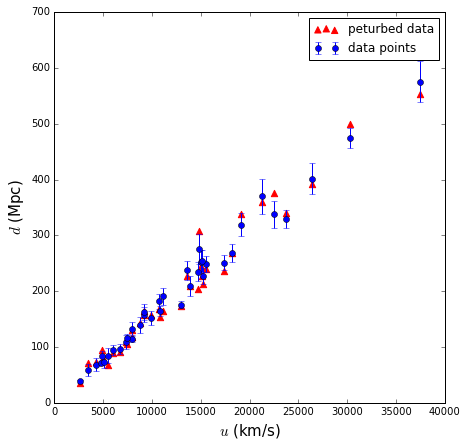

In [27]:
#Plotting perturbed data to see what it looks likes: 

plt.figure(figsize=(7,7))
plt.errorbar(vel,d,yerr=d_err,fmt='o',label='data points')
plt.legend()

#created pertubed data with mean~d and deviation ~d_err
y_p=np.random.normal(d,d_err)

plt.scatter(vel,y_p,color='red',s=40,marker='^',label='peturbed data')
plt.legend()
plt.xlabel('$u$ (km/s)',size=15)
plt.ylabel('$d$ (Mpc)',size=15)



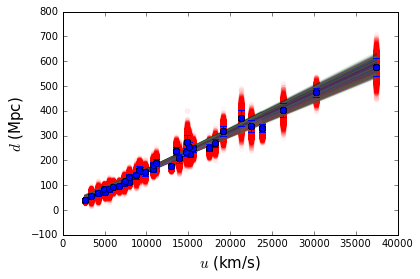

In [28]:
#Perturbe error data 10,000 times -- using a normal distribution and fit a line. 

#Generate numpy arrays! 
fit_line_1=np.ones(shape=(10000,1))
fit_line_2=np.ones(shape=(10000,1))
chis=np.ones(shape=(10000))

for i in range (0,10000):
    y_p=np.random.normal(d,d_err) #perturbe data!!
    fit_line=np.polyfit(vel,y_p,deg=1) #polyfit data
    fit_line_1[i]=fit_line[0] #stack the 1st column
    fit_line_2[i]=fit_line[1] #stack the 2nd column
    chi_square=sum(((d-(fit_line[0]*vel+fit_line[1]))**2)/(fit_line[0]*vel+fit_line[1]))  #not requiered
    chis[i]=chi_square
    Hc=1/fit_line_1 #hubble's constant for 1000 trials
    Age=fit_line_1
    plt.errorbar(vel,d,yerr=d_err,fmt='o',color='blue') #true points! 
    plt.scatter(vel,y_p,s=20,color='red',alpha=0.03)
    A=plt.plot(vel,fit_line[0]*vel+fit_line[1],alpha=0.1)
    plt.xlabel('$u$ (km/s)',size=15)
    plt.ylabel('$d$ (Mpc)',size=15)
    

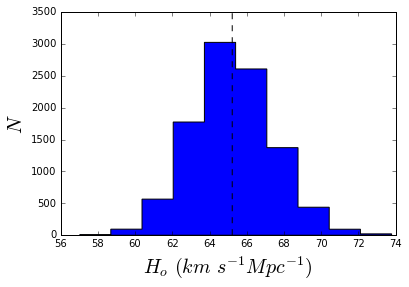

In [29]:
#Setup separate Numpy arrays
mean_hc=np.ones(shape=(1,3500))
median_hc=np.ones(shape=(1,3500))

mean_hc[:][0]=np.mean(Hc)
median_hc[:][0]=np.median(Hc)

Lines=np.arange(0,3500,step=1)

#Plot Hubble constant estimate for 10,000 trials! The mean is the dashed line at about ~65
plt.plot(mean_hc[0],Lines,color='k',ls='dashed',label='mean')
plt.hist(Hc,bins=10,histtype=u'stepfilled')
plt.xlabel('$H_{o}$ $(km$ $s^{-1}Mpc^{-1})$',size=20)
plt.ylabel('$N$',size=20)

## Weighted Numpy PolyFit -- Estimate Age and Hubble Constant

Numpy PolyFit Weighed Estimate Age of Universe: 14.9794619356
Numpy PolyFit Weighed Estimate Hubble Constant: 65.3270746442


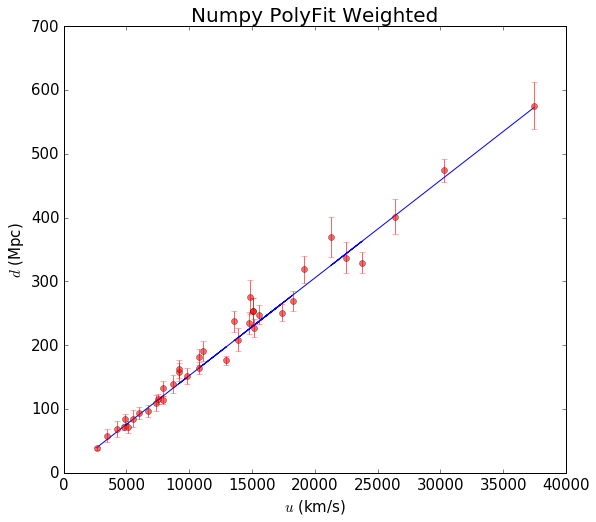

In [30]:

W_fit,cov=np.polyfit(vel,dist,deg=1,w=1/d_err,cov=True)

plt.figure(figsize=(9,8))
plt.plot(vel,W_fit[0]*vel+W_fit[1])
plt.errorbar(vel,dist,yerr=d_err,fmt='o',color='red',alpha=0.6)
plt.xlabel('$u$ (km/s)',size=15)
plt.ylabel('$d$ (Mpc)',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Numpy PolyFit Weighted',size=20)

print 'Numpy PolyFit Weighed Estimate Age of Universe: %s'%(W_fit[0][0]*3.086e19*3.17098e-8 * 10**-9) #Age of universe w/ weighted Numpy. 
print 'Numpy PolyFit Weighed Estimate Hubble Constant: %s'%(1/(W_fit[0][0])) #Age of universe w/ weighted Numpy. 
